# 1. Install 

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

# 2. Remove unwanted images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/data/'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
           

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/ImageClassification-main/data')

Found 305 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

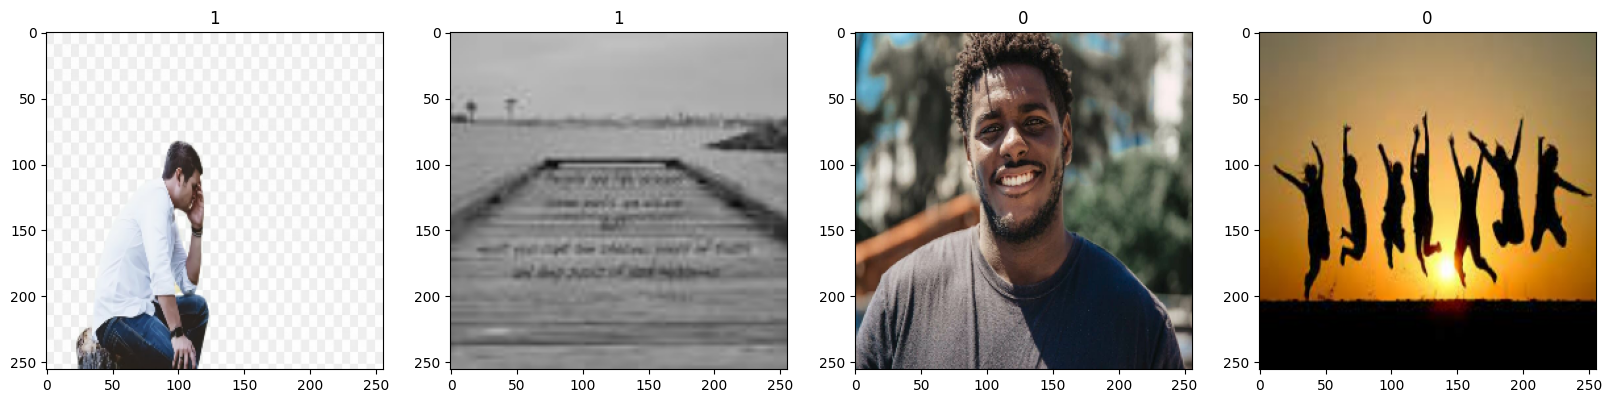

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.00392157, 0.1254902 ],
          [0.        , 0.00392157, 0.1254902 ],
          [0.        , 0.00392157, 0.1254902 ],
          ...,
          [0.        , 0.00392157, 0.1254902 ],
          [0.        , 0.00392157, 0.1254902 ],
          [0.        , 0.00392157, 0.1254902 ]],
 
         [[0.        , 0.00392157, 0.1254902 ],
          [0.        , 0.00392157, 0.1254902 ],
          [0.        , 0.00392157, 0.1254902 ],
          ...,
          [0.        , 0.00392157, 0.1254902 ],
          [0.        , 0.00392157, 0.1254902 ],
          [0.        , 0.00392157, 0.1254902 ]],
 
         [[0.        , 0.00392157, 0.1254902 ],
          [0.        , 0.00392157, 0.1254902 ],
          [0.        , 0.00392157, 0.1254902 ],
          ...,
          [0.        , 0.00392157, 0.1254902 ],
          [0.        , 0.00392157, 0.1254902 ],
          [0.        , 0.00392157, 0.1254902 ]],
 
         ...,
 
         [[0.        , 0.00392157, 0.09411765],
          [0.     

# 5. Splitting the Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

7

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Building Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Training the model

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 20s 759ms/step - loss: 1.2270 - accuracy: 0.4955 - val_loss: 0.6289 - val_accuracy: 0.5938
Epoch 2/20
7/7 [==============================] - 8s 909ms/step - loss: 0.6103 - accuracy: 0.6295 - val_loss: 0.6669 - val_accuracy: 0.6719
Epoch 3/20
7/7 [==============================] - 7s 578ms/step - loss: 0.6599 - accuracy: 0.6607 - val_loss: 0.5741 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 6s 556ms/step - loss: 0.5748 - accuracy: 0.6875 - val_loss: 0.5208 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 6s 541ms/step - loss: 0.5029 - accuracy: 0.8125 - val_loss: 0.4684 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 8s 720ms/step - loss: 0.4660 - accuracy: 0.7991 - val_loss: 0.4729 - val_accuracy: 0.7031
Epoch 7/20
7/7 [==============================] - 6s 545ms/step - loss: 0.4519 - accuracy: 0.7991 - val_loss: 0.3526 - val_accuracy: 0.8438
Epoch 8/20
7/7 [===

# 8. Plotting the graphs

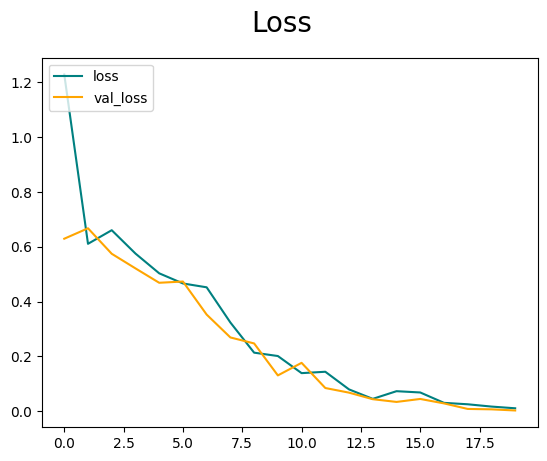

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

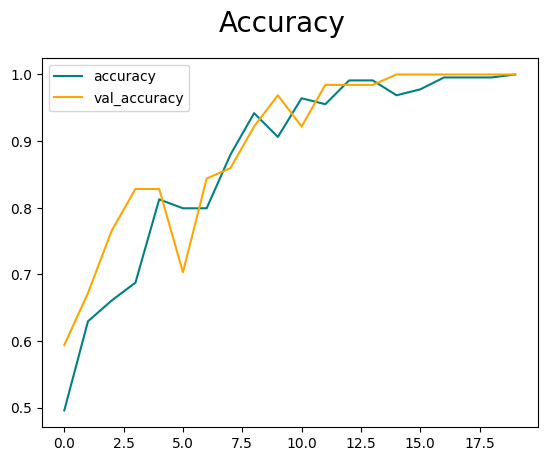

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluating the model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 340ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Testing from outside

In [ ]:
import cv2

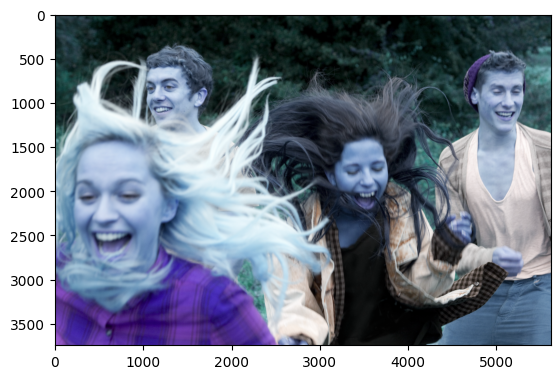

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ImageClassification-main/154006829.jpg')
plt.imshow(img)
plt.show()

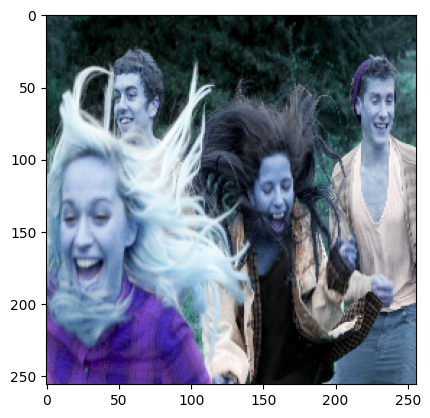

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 125ms/step


In [ ]:
yhat

array([[0.25608042]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','image.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('models/image.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 79ms/step


array([[0.25608042]], dtype=float32)